<a href="https://colab.research.google.com/github/Shravani-2002/Internship-Task/blob/main/Superstore_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame

#Pie Chart/ Bar graph
import matplotlib.pyplot as plt

In [ ]:
superstore = pd.read_csv("train.csv")

In [ ]:
superstore.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [ ]:
#Drop the unnecessary columns
superstore_clean = superstore.drop(['Row ID','Customer ID','Country','Product ID','Ship Date'],axis=1)

#Break down the date into a month and year
superstore_clean['Year'] = superstore_clean['Order Date'].astype(str).str[6:10]
superstore_clean['Month'] = superstore_clean['Order Date'].astype(str).str[3:5]
superstore_clean.drop(columns =["Order Date"], inplace = True)

superstore_clean.head()

,Order ID,Ship Mode,Customer Name,Segment,City,State,Postal Code,Region,Category,Sub-Category,Product Name,Sales,Year,Month
0,CA-2017-152156,Second Class,Claire Gute,Consumer,Henderson,Kentucky,42420.0,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2017,11
1,CA-2017-152156,Second Class,Claire Gute,Consumer,Henderson,Kentucky,42420.0,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,2017,11
2,CA-2017-138688,Second Class,Darrin Van Huff,Corporate,Los Angeles,California,90036.0,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2017,06
3,US-2016-108966,Standard Class,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,33311.0,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,2016,10
4,US-2016-108966,Standard Class,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,33311.0,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2016,10


In [ ]:
#Converting the data to prep it for correlation table

#Creating a new dataframe for us add and alter columns
superstore_clean_corr_df = superstore_clean.copy()

#Dropping columns to large to turn into categorical
superstore_clean_corr = superstore_clean_corr_df.drop(['Order ID','Customer Name','City','State','Sub-Category','Product Name'], axis = 1)

#Ship Mode:
superstore_clean_corr['Ship Mode'].unique()
superstore_clean_corr['Ship Mode'] = superstore_clean_corr['Ship Mode'].replace(["Same Day","First Class","Second Class","Standard Class"],["1","2","3","4"])
#Segment
superstore_segment = pd.get_dummies(superstore_clean_corr['Segment'])
superstore_clean_corr = pd.concat([superstore_clean_corr,superstore_segment], axis = 1)
superstore_clean_corr = superstore_clean_corr.drop(['Segment'],axis =1)

#Region
superstore_region = pd.get_dummies(superstore_clean_corr['Region'])
superstore_clean_corr = pd.concat([superstore_clean_corr,superstore_segment], axis = 1)
superstore_clean_corr = superstore_clean_corr.drop(['Region'],axis =1)

#Category
superstore_category = pd.get_dummies(superstore_clean_corr['Category'])
superstore_clean_corr = pd.concat([superstore_clean_corr,superstore_segment], axis = 1)
superstore_clean_corr = superstore_clean_corr.drop(['Category'],axis =1)

#Correlation table
superstore_clean_corr.corr()

<ipython-input-16-e07ae06263dc>:28: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  superstore_clean_corr.corr()


,Postal Code,Sales,Consumer,Corporate,Home Office,Consumer,Corporate,Home Office,Consumer,Corporate,Home Office
Postal Code,1.000000,-0.024067,0.012290,-0.010940,-0.002930,0.012290,-0.010940,-0.002930,0.012290,-0.010940,-0.002930
Sales,-0.024067,1.000000,-0.009483,0.002496,0.009388,-0.009483,0.002496,0.009388,-0.009483,0.002496,0.009388
Consumer,0.012290,-0.009483,1.000000,-0.684237,-0.485111,1.000000,-0.684237,-0.485111,1.000000,-0.684237,-0.485111
Corporate,-0.010940,0.002496,-0.684237,1.000000,-0.305772,-0.684237,1.000000,-0.305772,-0.684237,1.000000,-0.305772
Home Office,-0.002930,0.009388,-0.485111,-0.305772,1.000000,-0.485111,-0.305772,1.000000,-0.485111,-0.305772,1.000000
Consumer,0.012290,-0.009483,1.000000,-0.684237,-0.485111,1.000000,-0.684237,-0.485111,1.000000,-0.684237,-0.485111
Corporate,-0.010940,0.002496,-0.684237,1.000000,-0.305772,-0.684237,1.000000,-0.305772,-0.684237,1.000000,-0.305772
Home Office,-0.002930,0.009388,-0.485111,-0.305772,1.000000,-0.485111,-0.305772,1.000000,-0.485111,-0.305772,1.000000
Consumer,0.012290,-0.009483,1.000000,-0.684237,-0.485111,1.000000,-0.684237,-0.485111,1.000000,-0.684237,-0.485111
Corporate,-0.010940,0.002496,-0.684237,1.000000,-0.305772,-0.684237,1.000000,-0.305772,-0.684237,1.000000,-0.305772


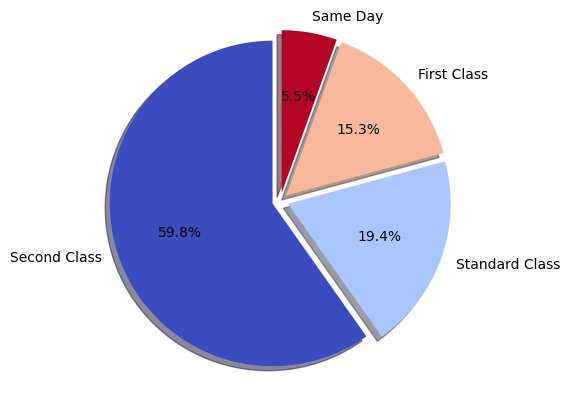

In [ ]:
#This is what we are focusing on
dataframe = superstore_clean['Ship Mode']
#the if statement is to ensure that there are no more than 5 values shown at the piechart and everything else will be clustered into 'other'
if dataframe.nunique() >= 5:
    #This creates the top 5 highest values
    dataframe_value_counts_top5 = dataframe.value_counts().nlargest(5)
    #This just counts how many are left after removing the top 5
    remaining = dataframe.nunique() - 5
    #This clusters the remaning counts into a seperate dataset
    other = dataframe.value_counts().nsmallest(remaining)
    #create a dataframe from the previous two datasets and sum together the 'other' dataset
    df_top5 = pd.DataFrame(dataframe_value_counts_top5)
    df_other = pd.DataFrame([other.sum()],columns = ['Sub-Category'],index = ['Other'])
    #combine the datasets
    df_top5_other = pd.concat([df_top5,df_other])
    df_top5_other_1 = pd.DataFrame(df_top5_other)
    df_top5_other_2 = df_top5_other_1.reset_index().rename(columns={'index': 'Unique', 'Sub-Category': 'Value Counts'})
    #this is the x axis and the y axis for the pie chart
    dataframe_unique = df_top5_other_2['Unique'].unique()

    dataframe_value_counts = df_top5_other_2['Value Counts']
else:
    dataframe_unique = dataframe.unique()
    dataframe_value_counts = dataframe.value_counts()
#this counts the amount of values that will have to be pulled for a color scheme, so you dont have to manually imput it
dataframe_unique_num = len(dataframe_unique)
cmap = plt.get_cmap('coolwarm')
colors = [cmap(i) for i in np.linspace(0, 1, dataframe_unique_num)]
#this multiplies the number of unique values by what kind of explosion you want
explode = [0.05] * dataframe_unique_num

plt.pie(dataframe_value_counts,
        explode=explode,
        labels=dataframe_unique,
        colors=colors,
        autopct='%1.1f%%',
        shadow=True,
        startangle=90)
plt.axis('equal')
plt.show()


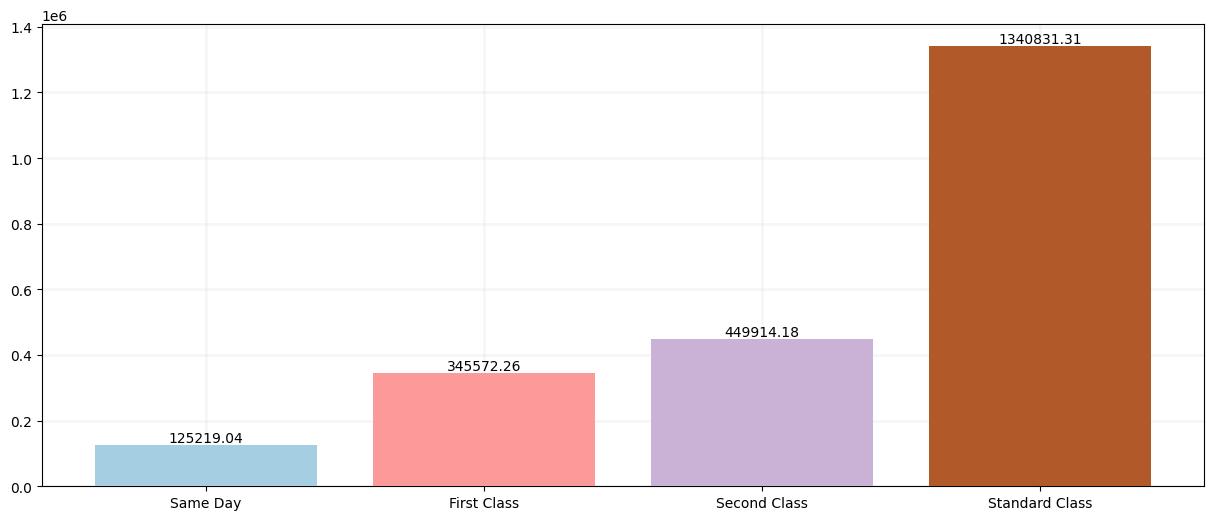

In [ ]:
# this is the dataset we are focusing on
dataframe = superstore.groupby(['Ship Mode'])['Sales'].sum().sort_values()

# this provides the top 10 highest value
if dataframe.nunique() >= 10:
    dataframe = dataframe.nlargest(10)

df_dataframe = pd.DataFrame(dataframe).reset_index()
x_axis = df_dataframe.iloc[:, 0].unique()
y_axis = df_dataframe.iloc[:, 1]
dataframe_unique_num = len(x_axis)
cmap = plt.get_cmap('Paired')
colors = [cmap(i) for i in np.linspace(0, 1, dataframe_unique_num)]

fig, ax = plt.subplots(figsize=(15, 6))

ax.bar(x_axis, y_axis, color=colors, zorder=3)

ax.grid(color='lightgrey', linestyle='-', linewidth=2, axis='both', alpha=0.2)
# this adds numbers to each bar
for i, v in enumerate(y_axis):
    ax.text(i, v, str(round(v, 2)), ha='center', va='bottom')

plt.show()

In [ ]:
#Determining gender based on customers name
#Dividing the "Customer Name" by first and last name

#Creating a second dataframe dedicated to altering
#superstore_clean_gender = superstore_clean.copy()

#new = superstore_clean_gender["Customer Name"].str.split(" ", n = 1, expand = True)

# making separate first name column from new data frame
#superstore_clean_gender["First Name"]= new[0]

# making separate last name column from new data frame
#superstore_clean_gender["Last Name"]= new[1]

# Dropping old Name columns
#superstore_clean_gender.drop(columns =["Customer Name"], inplace = True)

# df display
#superstore_clean_gender.head()
#There was no modern library to read genders from name

array([<Axes: ylabel='0'>], dtype=object)

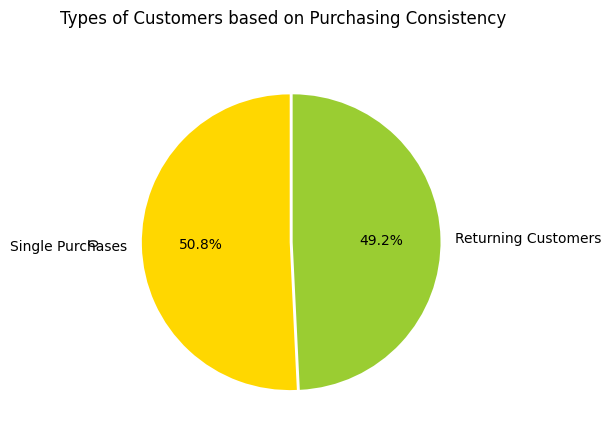

In [ ]:
#Determing returning customer based on Order ID
superstore_clean_vc = superstore_clean['Order ID'].value_counts()
superstore_clean_df = pd.DataFrame(superstore_clean_vc)

superstore_clean_df_single = pd.DataFrame(superstore_clean_df[superstore_clean_df['Order ID'] == 1].count())
superstore_clean_df_repeat = pd.DataFrame(superstore_clean_df[superstore_clean_df['Order ID'] > 1].count())

superstore_clean_df_piechart = pd.concat([superstore_clean_df_single,superstore_clean_df_repeat])
superstore_clean_df_piechart.plot(kind = "pie",
                                  subplots = True,
                                  explode = (0.01,0.01),
                                  colors = ['gold','yellowgreen'],
                                  labels = ['Single Purchases','Returning Customers'],
                                  startangle = 90,
                                  autopct = '%1.1f%%',
                                  title='Types of Customers based on Purchasing Consistency',
                                  legend = None)

In [ ]:
#Total Sales per Types of Customer
#Try to do the Gender Guesser either through a standard library or create a dictionary
#Types of Categories found in both types of customers

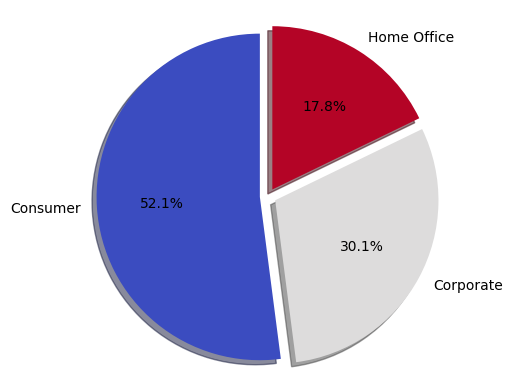

In [ ]:
#A percent distribution of types of customers
dataframe = superstore_clean['Segment']

if dataframe.nunique() >= 5:
    dataframe_value_counts_top5 = dataframe.value_counts().nlargest(5)
    remaining = dataframe.nunique() - 5
    other = dataframe.value_counts().nsmallest(remaining)
    df_top5 = pd.DataFrame(dataframe_value_counts_top5)
    df_other = pd.DataFrame([other.sum()],columns = ['Sub-Category'],index = ['Other'])
    df_top5_other = pd.concat([df_top5,df_other])
    df_top5_other_1 = pd.DataFrame(df_top5_other)
    df_top5_other_2 = df_top5_other_1.reset_index().rename(columns={'index': 'Unique', 'Sub-Category': 'Value Counts'})
    dataframe_unique = df_top5_other_2['Unique'].unique()
    dataframe_value_counts = df_top5_other_2['Value Counts']
else:
    dataframe_unique = dataframe.unique()
    dataframe_value_counts = dataframe.value_counts()

dataframe_unique_num = len(dataframe_unique)
cmap = plt.get_cmap('coolwarm')
colors = [cmap(i) for i in np.linspace(0, 1, dataframe_unique_num)]
explode = [0.05] * dataframe_unique_num

plt.pie(dataframe_value_counts,
        explode=explode,
        labels=dataframe_unique,
        colors=colors,
        autopct='%1.1f%%',
        shadow=True,
        startangle=90)

plt.axis('equal')
plt.show()

In [ ]:
#Categories found within each Segment
#Total Sales covered by Consumer Type

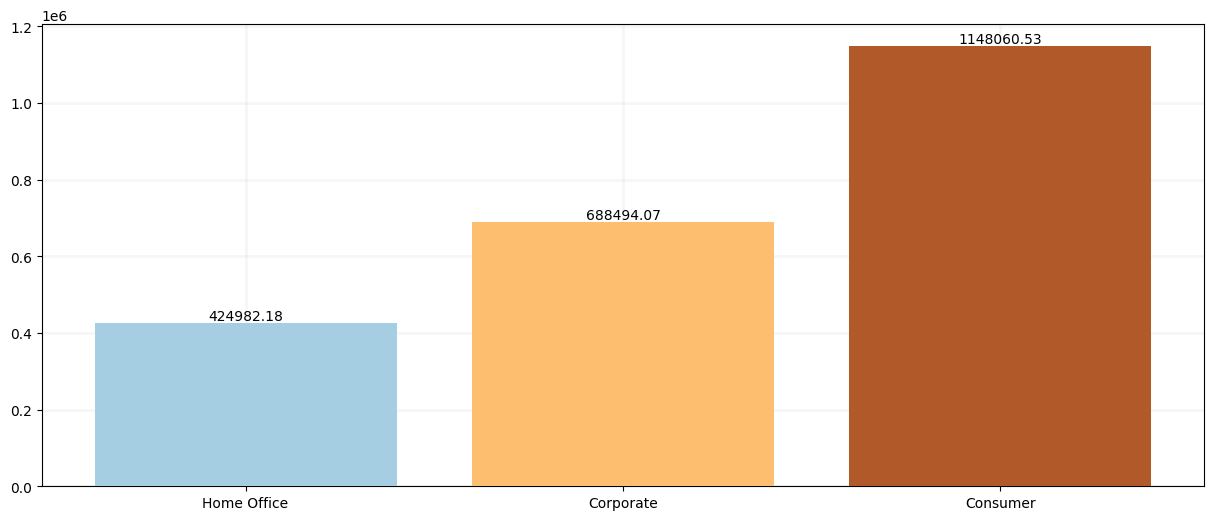

In [ ]:
# this is the dataset we are focusing on
dataframe = superstore.groupby(['Segment'])['Sales'].sum().sort_values()

# this provides the top 10 highest value
if dataframe.nunique() >= 10:
    dataframe = dataframe.nlargest(10)

df_dataframe = pd.DataFrame(dataframe).reset_index()
x_axis = df_dataframe.iloc[:, 0].unique()
y_axis = df_dataframe.iloc[:, 1]
dataframe_unique_num = len(x_axis)
cmap = plt.get_cmap('Paired')
colors = [cmap(i) for i in np.linspace(0, 1, dataframe_unique_num)]

fig, ax = plt.subplots(figsize=(15, 6))

ax.bar(x_axis, y_axis, color=colors, zorder=3)

ax.grid(color='lightgrey', linestyle='-', linewidth=2, axis='both', alpha=0.2)
# this adds numbers to each bar
for i, v in enumerate(y_axis):
    ax.text(i, v, str(round(v, 2)), ha='center', va='bottom')

plt.show()

In [ ]:
#Total Sales per city
# this is the dataset we are focusing on
dataframe = superstore.groupby(['City'])['Sales'].sum().sort_values()

# this provides the top 10 highest value
if dataframe.nunique() >= 10:ax.bar(x_axis, y_axis, color=colors, zorder=3)

ax.grid(color='lightgrey', linestyle='-', linewidth=2, axis='both', alpha=0.2)

# this adds numbers to each bar
for i, v in enumerate(y_axis):
    ax.text(i, v, str(round(v, 2)), ha='center', va='bottom')

plt.show()


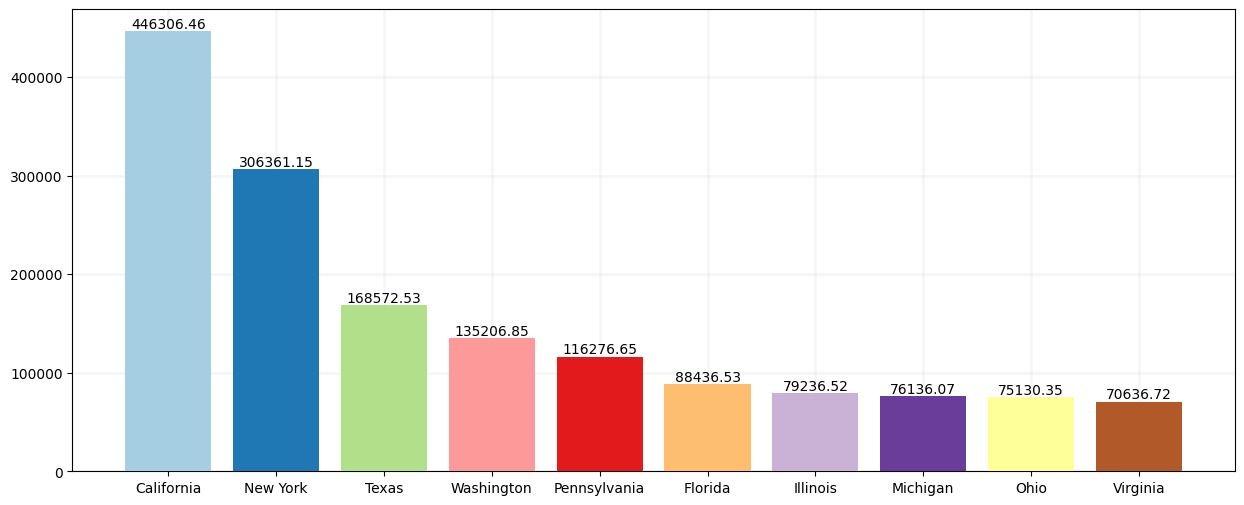

In [ ]:
# this is the dataset we are focusing on
dataframe = superstore.groupby(['State'])['Sales'].sum().sort_values()

# this provides the top 10 highest value
if dataframe.nunique() >= 10:
    dataframe = dataframe.nlargest(10)

df_dataframe = pd.DataFrame(dataframe).reset_index()
x_axis = df_dataframe.iloc[:, 0].unique()
y_axis = df_dataframe.iloc[:, 1]
dataframe_unique_num = len(x_axis)
cmap = plt.get_cmap('Paired')
colors = [cmap(i) for i in np.linspace(0, 1, dataframe_unique_num)]

fig, ax = plt.subplots(figsize=(15, 6))

ax.bar(x_axis, y_axis, color=colors, zorder=3)

ax.grid(color='lightgrey', linestyle='-', linewidth=2, axis='both', alpha=0.2)
# this adds numbers to each bar
for i, v in enumerate(y_axis):
    ax.text(i, v, str(round(v, 2)), ha='center', va='bottom')

plt.show()

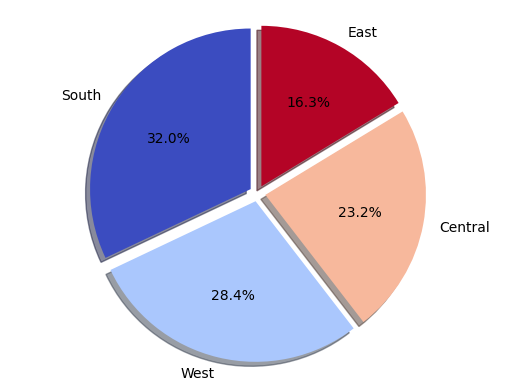

In [ ]:
dataframe = superstore_clean['Region']

if dataframe.nunique() >= 5:
    dataframe_value_counts_top5 = dataframe.value_counts().nlargest(5)
    remaining = dataframe.nunique() - 5
    other = dataframe.value_counts().nsmallest(remaining)
    df_top5 = pd.DataFrame(dataframe_value_counts_top5)
    df_other = pd.DataFrame([other.sum()],columns = ['Sub-Category'],index = ['Other'])
    df_top5_other = pd.concat([df_top5,df_other])
    df_top5_other_1 = pd.DataFrame(df_top5_other)
    df_top5_other_2 = df_top5_other_1.reset_index().rename(columns={'index': 'Unique', 'Sub-Category': 'Value Counts'})
    dataframe_unique = df_top5_other_2['Unique'].unique()
    dataframe_value_counts = df_top5_other_2['Value Counts']
else:
    dataframe_unique = dataframe.unique()
    dataframe_value_counts = dataframe.value_counts()

dataframe_unique_num = len(dataframe_unique)
cmap = plt.get_cmap('coolwarm')
colors = [cmap(i) for i in np.linspace(0, 1, dataframe_unique_num)]
explode = [0.05] * dataframe_unique_num

plt.pie(dataframe_value_counts,
        explode=explode,
        labels=dataframe_unique,
        colors=colors,
        autopct='%1.1f%%',
        shadow=True,
        startangle=90)

plt.axis('equal')
plt.show()

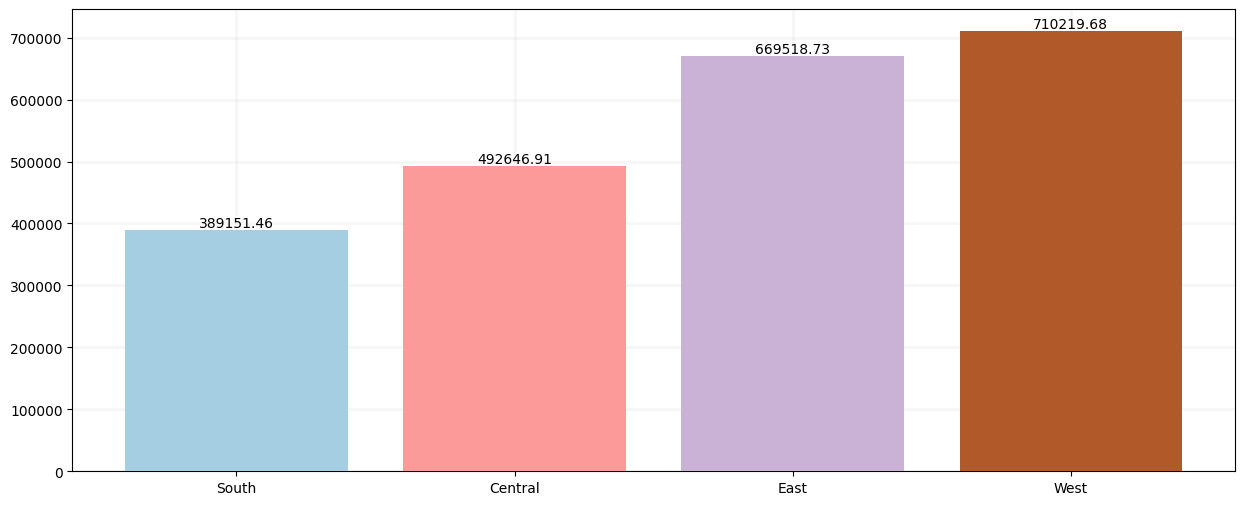

In [ ]:
# this is the dataset we are focusing on
dataframe = superstore.groupby(['Region'])['Sales'].sum().sort_values()

# this provides the top 10 highest value
if dataframe.nunique() >= 10:
    dataframe = dataframe.nlargest(10)

df_dataframe = pd.DataFrame(dataframe).reset_index()
x_axis = df_dataframe.iloc[:, 0].unique()
y_axis = df_dataframe.iloc[:, 1]
dataframe_unique_num = len(x_axis)
cmap = plt.get_cmap('Paired')
colors = [cmap(i) for i in np.linspace(0, 1, dataframe_unique_num)]

fig, ax = plt.subplots(figsize=(15, 6))

ax.bar(x_axis, y_axis, color=colors, zorder=3)

ax.grid(color='lightgrey', linestyle='-', linewidth=2, axis='both', alpha=0.2)

# this adds numbers to each bar
for i, v in enumerate(y_axis):
    ax.text(i, v, str(round(v, 2)), ha='center', va='bottom')

plt.show()


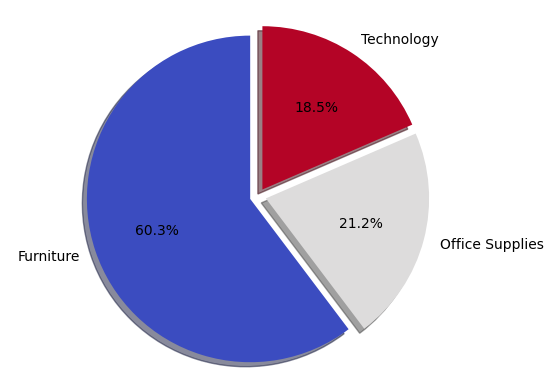

In [ ]:
dataframe = superstore_clean['Category']

if dataframe.nunique() >= 5:
    dataframe_value_counts_top5 = dataframe.value_counts().nlargest(5)
    remaining = dataframe.nunique() - 5
    other = dataframe.value_counts().nsmallest(remaining)
    df_top5 = pd.DataFrame(dataframe_value_counts_top5)
    df_other = pd.DataFrame([other.sum()],columns = ['Sub-Category'],index = ['Other'])
    df_top5_other = pd.concat([df_top5,df_other])
    df_top5_other_1 = pd.DataFrame(df_top5_other)
    df_top5_other_2 = df_top5_other_1.reset_index().rename(columns={'index': 'Unique', 'Sub-Category': 'Value Counts'})
    dataframe_unique = df_top5_other_2['Unique'].unique()
    dataframe_value_counts = df_top5_other_2['Value Counts']
else:
    dataframe_unique = dataframe.unique()
    dataframe_value_counts = dataframe.value_counts()

dataframe_unique_num = len(dataframe_unique)
cmap = plt.get_cmap('coolwarm')
colors = [cmap(i) for i in np.linspace(0, 1, dataframe_unique_num)]
explode = [0.05] * dataframe_unique_num

plt.pie(dataframe_value_counts,
        explode=explode,
        labels=dataframe_unique,
        colors=colors,
        autopct='%1.1f%%',
        shadow=True,
        startangle=90)

plt.axis('equal')
plt.show()

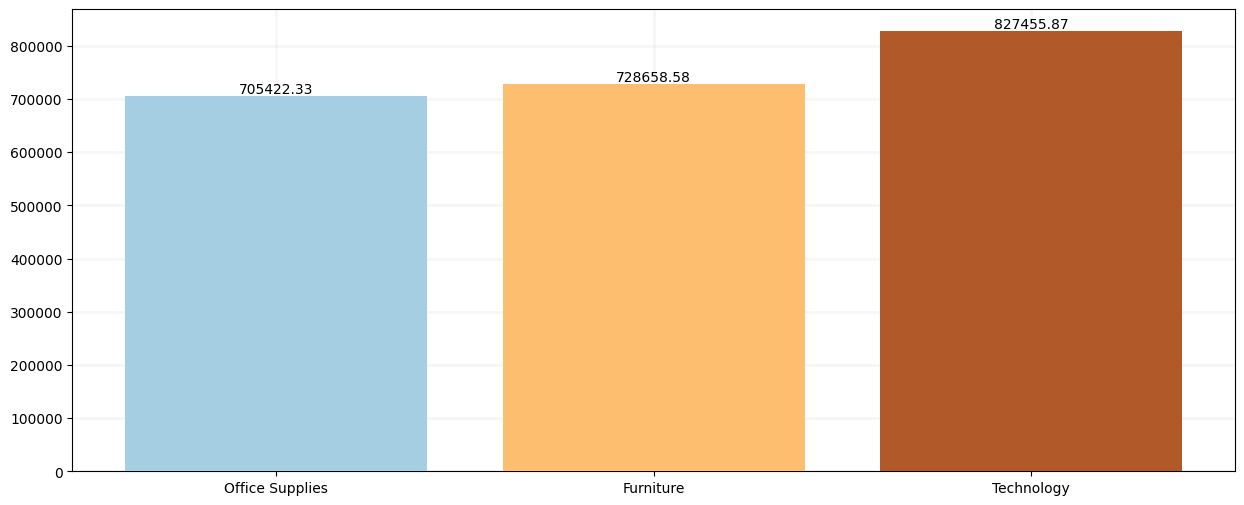

In [ ]:
# this is the dataset we are focusing on
dataframe = superstore.groupby(['Category'])['Sales'].sum().sort_values()

# this provides the top 10 highest value
if dataframe.nunique() >= 10:
    dataframe = dataframe.nlargest(10)

df_dataframe = pd.DataFrame(dataframe).reset_index()
x_axis = df_dataframe.iloc[:, 0].unique()
y_axis = df_dataframe.iloc[:, 1]
dataframe_unique_num = len(x_axis)
cmap = plt.get_cmap('Paired')
colors = [cmap(i) for i in np.linspace(0, 1, dataframe_unique_num)]

fig, ax = plt.subplots(figsize=(15, 6))

ax.bar(x_axis, y_axis, color=colors, zorder=3)

ax.grid(color='lightgrey', linestyle='-', linewidth=2, axis='both', alpha=0.2)
# this adds numbers to each bar
for i, v in enumerate(y_axis):
    ax.text(i, v, str(round(v, 2)), ha='center', va='bottom')

plt.show()

In [ ]:
superstore_clean_category_furniture = superstore_clean[superstore_clean['Category'] == 'Furniture']
superstore_clean_category_officesupplies = superstore_clean[superstore_clean['Category'] == 'Office Supplies']
superstore_clean_category_technology = superstore_clean[superstore_clean['Category'] == 'Technology']

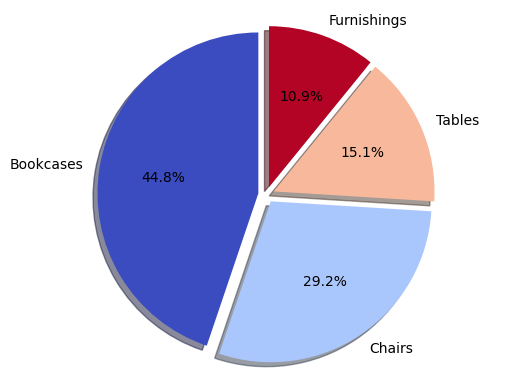

In [ ]:
dataframe = superstore_clean_category_furniture['Sub-Category']

if dataframe.nunique() >= 5:
    dataframe_value_counts_top5 = dataframe.value_counts().nlargest(5)
    remaining = dataframe.nunique() - 5
    other = dataframe.value_counts().nsmallest(remaining)
    df_top5 = pd.DataFrame(dataframe_value_counts_top5)
    df_other = pd.DataFrame([other.sum()],columns = ['Sub-Category'],index = ['Other'])
    df_top5_other = pd.concat([df_top5,df_other])
    df_top5_other_1 = pd.DataFrame(df_top5_other)
    df_top5_other_2 = df_top5_other_1.reset_index().rename(columns={'index': 'Unique', 'Sub-Category': 'Value Counts'})
    dataframe_unique = df_top5_other_2['Unique'].unique()
    dataframe_value_counts = df_top5_other_2['Value Counts']
else:
    dataframe_unique = dataframe.unique()
    dataframe_value_counts = dataframe.value_counts()

dataframe_unique_num = len(dataframe_unique)
cmap = plt.get_cmap('coolwarm')
colors = [cmap(i) for i in np.linspace(0, 1, dataframe_unique_num)]
explode = [0.05] * dataframe_unique_num
plt.pie(dataframe_value_counts,
        explode=explode,
        labels=dataframe_unique,
        colors=colors,
        autopct='%1.1f%%',
        shadow=True,
        startangle=90)

plt.axis('equal')
plt.show()

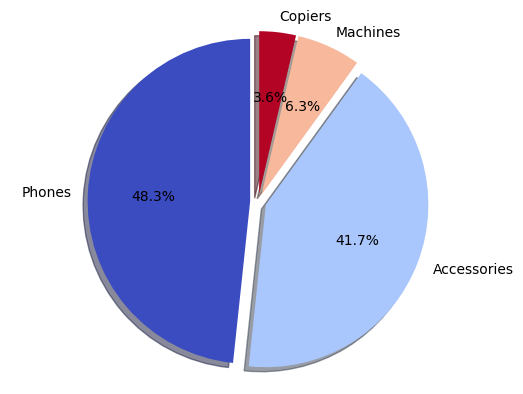

In [ ]:
dataframe = superstore_clean_category_technology['Sub-Category']

if dataframe.nunique() >= 5:
    dataframe_value_counts_top5 = dataframe.value_counts().nlargest(5)
    remaining = dataframe.nunique() - 5
    other = dataframe.value_counts().nsmallest(remaining)
    df_top5 = pd.DataFrame(dataframe_value_counts_top5)
    df_other = pd.DataFrame([other.sum()],columns = ['Sub-Category'],index = ['Other'])
    df_top5_other = pd.concat([df_top5,df_other])
    df_top5_other_1 = pd.DataFrame(df_top5_other)
    df_top5_other_2 = df_top5_other_1.reset_index().rename(columns={'index': 'Unique', 'Sub-Category': 'Value Counts'})
    dataframe_unique = df_top5_other_2['Unique'].unique()
    dataframe_value_counts = df_top5_other_2['Value Counts']
else:
    dataframe_unique = dataframe.unique()
    dataframe_value_counts = dataframe.value_counts()

dataframe_unique_num = len(dataframe_unique)
cmap = plt.get_cmap('coolwarm')
colors = [cmap(i) for i in np.linspace(0, 1, dataframe_unique_num)]
explode = [0.05] * dataframe_unique_num

plt.pie(dataframe_value_counts,
        explode=explode,
        labels=dataframe_unique,
        colors=colors,
        autopct='%1.1f%%',
        shadow=True,
        startangle=90)

plt.axis('equal')
plt.show()


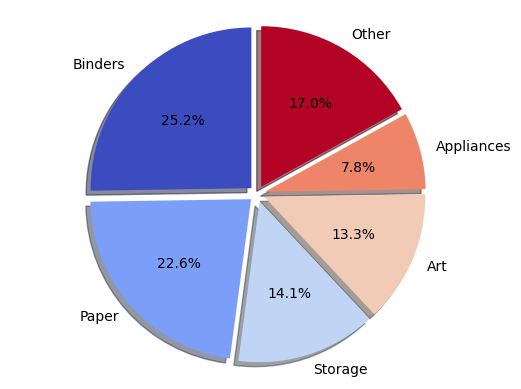

In [ ]:
dataframe = superstore_clean_category_officesupplies['Sub-Category']

if dataframe.nunique() >= 5:
    dataframe_value_counts_top5 = dataframe.value_counts().nlargest(5)
    remaining = dataframe.nunique() - 5
    other = dataframe.value_counts().nsmallest(remaining)
    df_top5 = pd.DataFrame(dataframe_value_counts_top5)
    df_other = pd.DataFrame([other.sum()],columns = ['Sub-Category'],index = ['Other'])
    df_top5_other = pd.concat([df_top5,df_other])
    df_top5_other_1 = pd.DataFrame(df_top5_other)
    df_top5_other_2 = df_top5_other_1.reset_index().rename(columns={'index': 'Unique', 'Sub-Category': 'Value Counts'})
    dataframe_unique = df_top5_other_2['Unique'].unique()
    dataframe_value_counts = df_top5_other_2['Value Counts']
else:
    dataframe_unique = dataframe.unique()
    dataframe_value_counts = dataframe.value_counts()

dataframe_unique_num = len(dataframe_unique)
cmap = plt.get_cmap('coolwarm')
colors = [cmap(i) for i in np.linspace(0, 1, dataframe_unique_num)]
explode = [0.05] * dataframe_unique_num

plt.pie(dataframe_value_counts,
        explode=explode,
        labels=dataframe_unique,
        colors=colors,
        autopct='%1.1f%%',
        shadow=True,
        startangle=90)

plt.axis('equal')
plt.show()

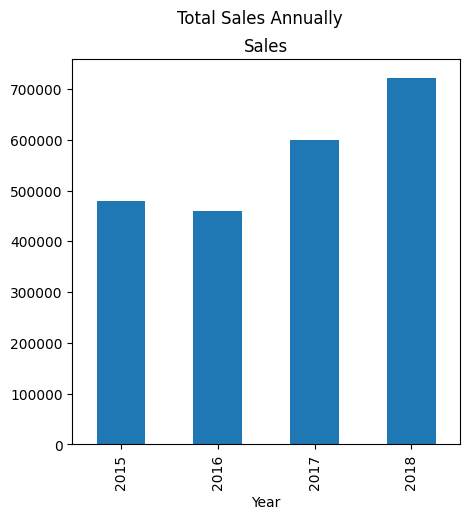

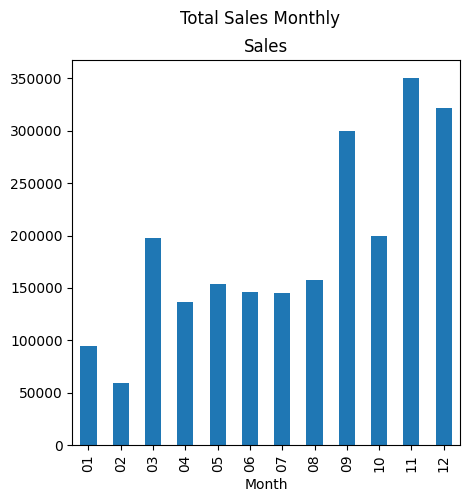

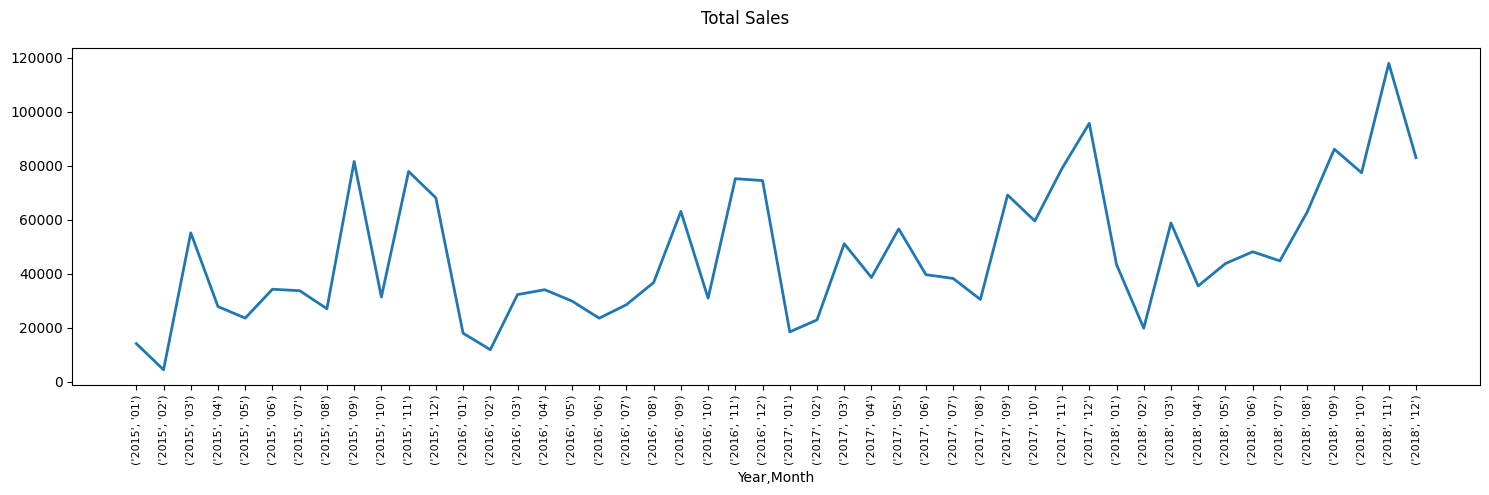

In [ ]:
superstore_clean_sales = superstore_clean[['Year','Month','Sales']].groupby(['Year','Month']).sum()
superstore_clean_year = superstore_clean[['Year','Sales']].groupby(['Year']).sum()
superstore_clean_month = superstore_clean[['Month','Sales']].groupby(['Month']).sum()

superstore_clean_year.plot(kind='bar',
                           figsize = (5,5),
                           subplots = True,
                           legend = False,
                           width = 0.5,
                           title = ('Total Sales Annually'))

superstore_clean_month.plot(kind='bar',
                           figsize = (5,5),
                           subplots = True,
                           legend = False,
                           width = 0.5,
                           title = ('Total Sales Monthly'))
superstore_clean_sales.plot(kind='line',
                           figsize = (15,5),
                            linewidth = 2,
                           subplots = True,
                           legend = False,
                           title = ('Total Sales'))
plt.xticks(range(len(superstore_clean_sales.index)), superstore_clean_sales.index, rotation=90, fontsize=8)

plt.tight_layout()